In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [23]:
class system_parameters:
    def __init__(self, r_star, r_planet, period, inclination, semi):
        #Taking inputs and initializing the required parameters for plotting the light curve for the system.
        self.r_s= r_star*u.Rsun
        self.r_p= r_planet*u.Rsun
        self.P=period*u.year
        self.i=inclination
        self.a= semi*u.Rsun
        self.Delta()
        self.total_time()
        self.time_f()
        
    def Delta(self):
        #Function to calculate delta
        self.delta= (self.r_p/self.r_s)**2
        
    def total_time(self):
        #Function to calculate the ratio of total transit time and period
        self.t_T= ((self.P/np.pi*(self.r_s/self.a))*np.sqrt((1+self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2))/self.P
        
    def time_f(self):
        #Function to calculate tf/P 
        self.t_f=self.t_T*np.sqrt((1-self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2)/np.sqrt((1+self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2)
    
    def parameters(self):
        print(self.r_s,self.r_p,self.P,self.i,self.a,self.delta,self.t_T,self.t_f)

In [24]:
#Using the parameters of the Sun and Jupiter
test= system_parameters(1,0.1,12,90,1113.9)
test.parameters()

1.0 solRad 0.1 solRad 12.0 yr 90 1113.9 solRad 0.010000000000000002 0.0002886192522179985 0.00028290401950081036


In [64]:
def fun(tT,tf,d,m, x):
    #Function to define a piece-wisely defined function for the light curve.
    y=[]
    for i in range(len(x)):
        if x[i]<(0.5-tT/2):
            y.append(1)
        elif (0.5-tT/2)<=x[i]<(0.5-tf/2):
            y.append(-m*x[i]+1+m*(0.5-tT/2))
        elif (0.5-tf/2)<=x[i]<(0.5+tf/2):
            y.append(1-d)
        elif (0.5+tf/2)<=x[i]<(0.5+tT/2):
            y.append(m*x[i]+1-m*(0.5+tT/2))
        elif x[i]>=(0.5+tT/2):
            y.append(1)
    
    arr=np.array(y)
    
    return arr
    

In [79]:
def light_curve(system):
    #Function to plot the light curve based on the piece-wisely defined function.
    new_lum= 1-system.delta
    trans_time= (system.t_T-system.t_f)/2
    m= (system.delta)/trans_time
    
    x = np.linspace(0.5-system.t_T, 0.5+system.t_T, 2000)
    y = fun(system.t_T,system.t_f,system.delta,m,x)
    
    #Plotting
    plt.plot(x,y)
    plt.xlabel("t/P")
    plt.ylabel("L/L_star")

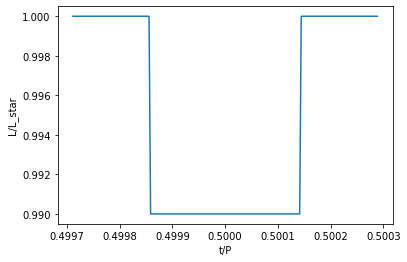

In [80]:
light_curve(test)